### Problem 5. (Bias and Variance in Tree-based Bagging Ensemble Methods)

In this problem, we'll investigate the bias and the variance of two different estimators: a 2-split tree and a 4-split tree. We'll see (once again) that fitting the data more precisely is not always a good idea.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

### a)

Suppose our dataset $\mathcal D$ consists of $n=10$ data points drawn randomly from two moons and is balanced. Points are labeled 1 in one moon and 0 in the other moon. We set 0.05 to be the standard deviation of Gaussian noise in the data.

Generate a sample dataset using random_state=2, and plot it. (Note: because the data is 2-dimensional, have the x- and y-coordinates on the axes and represent the label with the color blue for 1 and red for 0.)

In [2]:
from sklearn.datasets import make_moons

In [16]:
n = 10
X, y = make_moons(n_samples = (int(n/2), int(n/2)), noise = 0.05, random_state = 2)

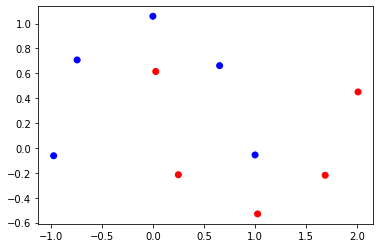

In [17]:
colors = ['red' if x==1 else 'blue' for x in y.tolist()]
plt.scatter(X[:,0], X[:,1], color = colors)

### b)

Fit a decision tree model with 2 splits to $\mathcal D$. Use random_state= 2. (Hint: for n splits, there are at most n+1 leaf nodes.)

Plot this tree in the form of rectangular partitions of the feature space with $\mathcal D$. Use lines to mark the splits, and shade the regions with the correct label color.

In [18]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

[Text(133.92000000000002, 181.2, 'X[0] <= 0.013\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(66.96000000000001, 108.72, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(200.88000000000002, 108.72, 'X[1] <= 0.638\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(133.92000000000002, 36.23999999999998, 'gini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(267.84000000000003, 36.23999999999998, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

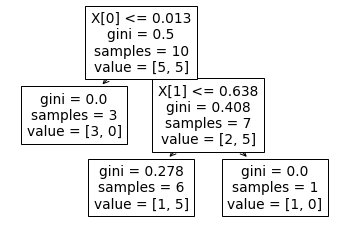

In [21]:
clf = DecisionTreeClassifier(random_state=2, max_leaf_nodes = 3)
clf.fit(X, y)
tree.plot_tree(clf)

In [36]:
print(tree.export_text(clf, feature_names=["x1", "x2"]))

|--- x1 <= 0.01
|   |--- class: 0
|--- x1 >  0.01
|   |--- x2 <= 0.64
|   |   |--- class: 1
|   |--- x2 >  0.64
|   |   |--- class: 0



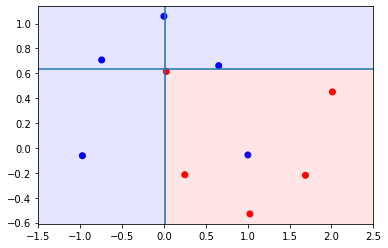

In [50]:
import math
plt.xlim(-1.5, 2.5)
colors = ['red' if x==1 else 'blue' for x in y.tolist()]
plt.scatter(X[:,0], X[:,1], color = colors)
plt.axvline(x=0.013)
plt.axhline(y=0.638)
plt.axvspan(xmin = -1.5, xmax = 0.013, color='blue', alpha=0.1)
plt.axvspan(xmin = 0.013, xmax = 2.5, ymax = 0.71, color='red', alpha=0.1)
plt.axvspan(xmin = 0.013, xmax = 2.5, ymin = 0.71, color='blue', alpha=0.1)

### c)

Fit a decision tree model with 4 splits to $\mathcal D$. Use random_state= 2.

Plot this tree in the form of rectangular partitions of the feature space with $\mathcal D$.

[Text(167.4, 195.696, 'X[0] <= 0.013\ngini = 0.5\nsamples = 10\nvalue = [5, 5]'),
 Text(111.60000000000001, 152.208, 'gini = 0.0\nsamples = 3\nvalue = [3, 0]'),
 Text(223.20000000000002, 152.208, 'X[1] <= 0.638\ngini = 0.408\nsamples = 7\nvalue = [2, 5]'),
 Text(167.4, 108.72, 'X[0] <= 1.015\ngini = 0.278\nsamples = 6\nvalue = [1, 5]'),
 Text(111.60000000000001, 65.232, 'X[0] <= 0.626\ngini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(55.800000000000004, 21.744, 'gini = 0.0\nsamples = 2\nvalue = [0, 2]'),
 Text(167.4, 21.744, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]'),
 Text(223.20000000000002, 65.232, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]'),
 Text(279.0, 108.72, 'gini = 0.0\nsamples = 1\nvalue = [1, 0]')]

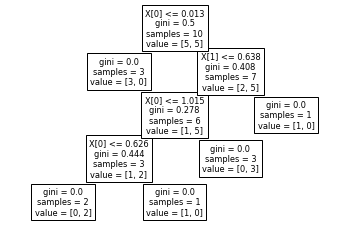

In [51]:
clf = DecisionTreeClassifier(random_state=2, max_leaf_nodes = 5)
clf.fit(X, y)
tree.plot_tree(clf)

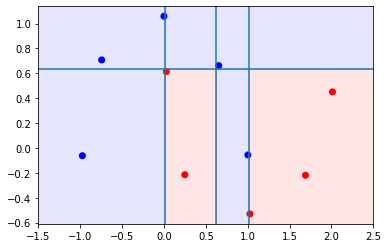

In [58]:
import math
plt.xlim(-1.5, 2.5)
colors = ['red' if x==1 else 'blue' for x in y.tolist()]
plt.scatter(X[:,0], X[:,1], color = colors)
plt.axvline(x=0.013)
plt.axvline(x=1.015)
plt.axvline(x=0.626)
plt.axhline(y=0.638)
plt.axvspan(xmin = -1.5, xmax = 0.013, color='blue', alpha=0.1)
plt.axvspan(xmin = 0.013, xmax = 0.626, ymax = 0.71, color='red', alpha=0.1)
plt.axvspan(xmin = 1.015, xmax = 2.5, ymax = 0.71, color='red', alpha=0.1)
plt.axvspan(xmin = 0.013, xmax = 2.5, ymin = 0.71, color='blue', alpha=0.1)
plt.axvspan(xmin = 0.626, xmax = 1.015, ymax = 0.71, color='blue', alpha=0.1)

### d)

Repeat parts b) and c) to fit models for 1000 different randomly drawn sets $\mathcal D$ from a newly generated set of 10,000 points using random_state=2. Average the individual 2-split decision trees to get the "average" 2-split decision tree model $\bar{t}(x)$ using the bagging ensemble method learned in class. Plot $\bar{t}(x)$ for all 10,000 points.

Do the same for 4-split decision trees to get $\bar{f}(x)$.

In [54]:
from sklearn.ensemble import BaggingClassifier

### e)

Compute the squared bias of $\bar{t}(x)$ and $\bar{f}(x)$. Which model has smaller squared bias?

__Response:__

### f)

Compute the variance of $\bar{t}(x)$ and $\bar{f}(x)$. Which model has smaller variance? How do you interpret this? Which model has smaller overall error?

__Response:__

### g)

How do you think your results (for bias, variance, and total error) depend on the number of points used to train each bagged model? Perform an experiment to check. Explain what you observe.

For clarity, here is a list of parameters you should be considering:

* number of bagged models = 1000
* number of points used to train each bagged model = $n \in \{5, 10, 15, ..., 30 \}$


__Response:__

### h)

As we increase the number of models to average in our bagging ensemble method, we should expect our model (which may be quite complex!) to not only fit the training data better but to also generalize better to a test set.

Using a test set of size 10000 with noise=0.05 and random_state=3, verify this by computing the average out-of-sample misclassification error over 10 replications for each choice of number of bagged models in the range $R = \{1,5,10,20,30,40,50,75,100,150\}$. Use 4-split tree models trained on randomly chosen datasets of size $10$ and plot averaged test error vs number of bagged models.

In particular, for each number of bagged models $r\in R$, build 10 different 4-split tree models with n_estimators = $r$ and max_samples=10, and average the out-of-sample misclassification error over all 10 models. 

Note that averaging over many replications reduces the inherent variability in the noise of the dataset.

For clarity, here is a list of parameters that you should be considering:

* number of bagged models = $r \in R = \{1,5,10,20,30,40,50,75,100,150\} $
* number of replications = number of bagging classifiers to train for a given $r$ = 10 
* number of points used to train each bagged model = 10

